In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D
import pickle 

In [2]:
images = []
classNo = []
path = "num"
for i in range(0, 10):
    mylist = os.listdir(path + "/"  + str(i))
    for j in mylist:
        img = cv.imread(path + "/" + str(i) + "/" + j)
        img = cv.resize(img, (32,32))
        images.append(img)
        classNo.append(i)

In [3]:
myList = os.listdir(path)
noofclasses = len(myList)
noofclasses

10

In [4]:
images = np.array(images)
classNo = np.array(classNo)

In [5]:
images.shape

(11258, 32, 32, 3)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(images, classNo,train_size=0.7, test_size=0.3, random_state=42)
xtrain, xvalid, ytrain, yvalid = train_test_split(xtrain, ytrain, test_size=0.3)

In [8]:
xtrain.shape

(5516, 32, 32, 3)

In [9]:
def preprocess(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.equalizeHist(img)
    img = img/255
    return img

In [10]:
xtrain = np.array(list(map(preprocess, xtrain)))
xtest = np.array(list(map(preprocess, xtest)))
xvalid = np.array(list(map(preprocess, xvalid)))

In [11]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], xtrain.shape[2], 1)
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], xtest.shape[2], 1)
xvalid = xvalid.reshape(xvalid.shape[0], xvalid.shape[1], xvalid.shape[2], 1)

In [12]:
xtrain.shape

(5516, 32, 32, 1)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [14]:
xtrain = xtrain.reshape(-1, 32, 32, 1)

In [15]:
datagen = ImageDataGenerator(
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.2,
            shear_range=0.1,
            rotation_range=10
            )
datagen.fit(xtrain)

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
ytrain = to_categorical(ytrain, 10)
ytest = to_categorical(ytest, 10)
yvalid = to_categorical(yvalid, 10)

In [18]:
ytrain.shape

(5516, 10)

In [19]:
xtrain.shape

(5516, 32, 32, 1)

In [20]:
def myModel():
    nooffilters = 60
    sizeoff1 = (5,5)
    sizeoff2 = (3,3)
    sizeofPool = (2,2)
    noofNode = 500
    
    model = Sequential()
    model.add((Conv2D(nooffilters, sizeoff1, input_shape = (32,32,1), activation="relu")))
    model.add((Conv2D(nooffilters, sizeoff1, activation="relu")))
    model.add(MaxPooling2D(pool_size=sizeofPool))
    
    model.add((Conv2D(nooffilters//2, sizeoff2,  activation="relu")))
    model.add((Conv2D(nooffilters//2, sizeoff2, activation="relu")))
    model.add(MaxPooling2D(pool_size=sizeofPool))
    
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(noofNode, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(noofclasses, activation="softmax"))
    model.compile(Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=['accuracy'])
    
    return model

In [21]:
model = myModel()

C:\Users\prans\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 60)          │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 60)          │          90,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 30)          │          16,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 30)            │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4, 4, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         240,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361,490 (1.38 MB)

 Trainable params: 361,490 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
yvalid.shape

(2364, 10)

In [30]:
batchsize = 10
epochsval = 10
# steps_per_epoch = 2000
# num_batches = len(xtrain) // batchsize
# print(num_batches)
# Ensure steps_per_epoch does not exceed num_batches
# steps_per_epoch = len(xtrain)//batchsize
# train_generator = datagen.flow(xtrain, ytrain, batch_size=batchsize)
# for epoch in range(epochsval):
#     train_generator.reset()
#     history = model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=1, 
#                     validation_data=(xvalid, yvalid), shuffle=True)
history = model.fit(datagen.flow(xtrain, ytrain, batch_size=batchsize), epochs = epochsval, validation_data=(xvalid, yvalid), shuffle=1, verbose=1)

Epoch 1/10
  5/552 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9910 - loss: 0.0486 

C:\Users\prans\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


552/552 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9173 - loss: 0.2692 - val_accuracy: 0.9797 - val_loss: 0.0638
Epoch 2/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9498 - loss: 0.1598 - val_accuracy: 0.9805 - val_loss: 0.0593
Epoch 3/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9502 - loss: 0.1622 - val_accuracy: 0.9801 - val_loss: 0.0673
Epoch 4/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9514 - loss: 0.1544 - val_accuracy: 0.9835 - val_loss: 0.0560
Epoch 5/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9458 - loss: 0.1629 - val_accuracy: 0.9805 - val_loss: 0.0576
Epoch 6/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9578 - loss: 0.1343 - val_accuracy: 0.9772 - val_loss: 0.0656
Epoch 7/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9658 - loss: 0.1097 - val_accuracy: 0.9797 - val_loss: 0.0602
Epoch 8/10
552/552 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9557 - loss: 0.1493 - val_accuracy: 0.978

In [31]:
    history.history['val_loss']

[0.06379950046539307,
 0.059258267283439636,
 0.06731914728879929,
 0.05601733922958374,
 0.05763114243745804,
 0.06564758718013763,
 0.060157716274261475,
 0.06030438095331192,
 0.07900010794401169,
 0.04979521036148071]

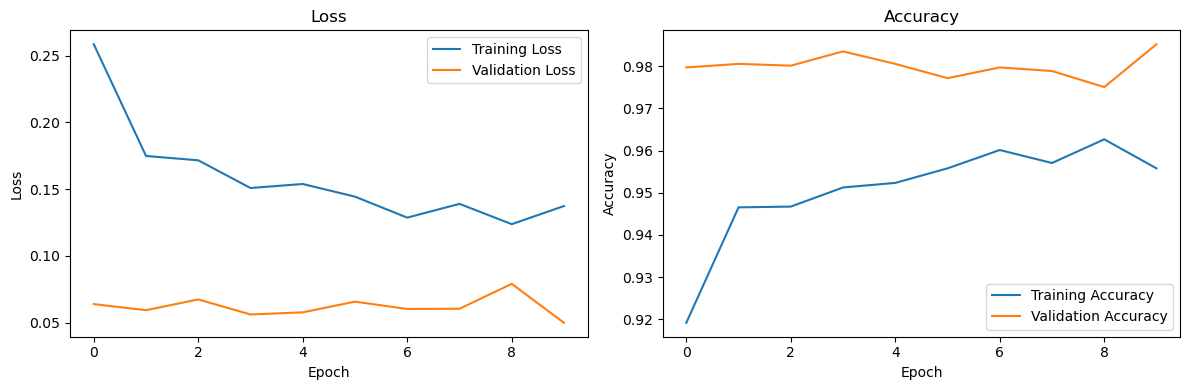

106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9828 - loss: 0.0548
0.048184603452682495
0.9860864281654358


In [32]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
score = model.evaluate(xtest, ytest)
print(score[0])
print(score[1])

In [33]:
pickle_out = open("model_training.p", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()